Capstone: Snow Prediction Project
Exploratory Data Analysis

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [9]:
#load data
os.chdir('C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data')
file_path = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data/snow_data_cleaned.csv'
snow_data = pd.read_csv(file_path)

In [13]:
snow_data.shape

(12429, 77)

In [11]:
snow_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12429 entries, 0 to 12428
Data columns (total 77 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  12429 non-null  object 
 1   station_name          12429 non-null  object 
 2   elevation             12429 non-null  int64  
 3   latitude              12429 non-null  float64
 4   longitude             12429 non-null  float64
 5   snowdepth             12429 non-null  float64
 6   precip_accumulation   12429 non-null  float64
 7   precip_increment      12429 non-null  float64
 8   airtemp_avg           12429 non-null  float64
 9   airtemp_max           12429 non-null  float64
 10  airtemp_min           12429 non-null  float64
 11  airtemp_obs           12429 non-null  float64
 12  soiltemp_obs          12429 non-null  float64
 13  soilmoisture_avg      12429 non-null  float64
 14  soilmoisture_max      12429 non-null  float64
 15  soilmoisture_min   

In [ ]:
#Step 1 Explore each variable

In [ ]:
Explore data by station 

In [7]:
avg_snow_depth_station= snow_data.groupby('station_name')['snowdepth'].mean()
print(avg_snow_depth_station)

station_name
Brighton             20.605911
Dry Fork             14.387521
Mill Creek Canyon     4.984615
Mill-D North         22.810619
Powder Mountain      28.857704
Name: snowdepth, dtype: float64


Powder Mtn shows a large lead in the average mean of snow depth

In [9]:
elevation_station= snow_data.groupby('station_name')['elevation'].mean()
print(elevation_station)

station_name
Brighton             8790.0
Dry Fork             7190.0
Mill Creek Canyon    6960.0
Mill-D North         8940.0
Powder Mountain      8490.0
Name: elevation, dtype: float64


In [11]:
avg_precip_station= snow_data.groupby('station_name')['precip_accumulation'].mean()
print(avg_precip_station)

station_name
Brighton             23.108101
Dry Fork             17.297126
Mill Creek Canyon     3.465128
Mill-D North         23.188314
Powder Mountain      24.607311
Name: precip_accumulation, dtype: float64


Pwder Mtn again has the similar precipitation but averagely more snow depth, could another feature or variable interaction be the cause? 

In [43]:
avg_airtemp_station= snow_data.groupby('station_name')['airtemp_obs'].mean()
print(avg_airtemp_station)

station_name
Brighton             36.326683
Dry Fork             38.754625
Mill Creek Canyon    41.554359
Mill-D North         37.757334
Powder Mountain      39.010849
Name: airtemp_obs, dtype: float64


The average air temperatures are similar: could indicate consistency in snowfall drivers, maybe predictability of snow depth, and influence of non-temperature factors.

In [32]:
#Location data of snow depth by each station
station_description = snow_data.groupby('station_name')['snowdepth'].describe()

mode = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.mode().iloc[0])
iqr = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

station_description['mode'] = mode
station_description['iqr'] = iqr

print(station_description)

print()
print(f"Spread Statistics:")
#Spread Statistics 
std_dev = snow_data.groupby('station_name')['snowdepth'].std()
variance = snow_data.groupby('station_name')['snowdepth'].var()
value_range = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.max() - x.min())
iqr_range = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
print()
print(f"Standard Devivation of Snow Depth for each Station: {std_dev}")
print()
print(f"Variance of Snow Depth for each Station: {variance}")
print()
print(f"Value Range of Snow Depth for each Station: {value_range}")
print()
print(f"Interqurtile Range Snow Depth for each Station: {iqr_range}")

print()
print()
print(f"Shape Statistics:")
#Shape Statistics 
skewness = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.skew())
kurtosis = snow_data.groupby('station_name')['snowdepth'].apply(lambda x: x.kurt())

print()
print(f"Skewness of Snowdepth for each Station:")
print(skewness)
print()
print(f"Kurtosis of Snowdepth for each Station:")
print(kurtosis)
#Describes the shape of distribution's tails in relation to its overall shape


                    count       mean        std  min  25%  50%   75%    max  \
station_name                                                                  
Brighton           3654.0  20.605911  25.590131  0.0  0.0  6.0  37.0  122.0   
Dry Fork           3654.0  14.387521  18.978090  0.0  0.0  1.0  27.0   98.0   
Mill Creek Canyon   195.0   4.984615   8.214569  0.0  0.0  0.0   8.0   29.0   
Mill-D North       3654.0  22.810619  28.538768  0.0  0.0  7.0  41.0  155.0   
Powder Mountain    1272.0  28.857704  35.025822  0.0  0.0  9.0  51.0  155.0   

                   mode   iqr  
station_name                   
Brighton            0.0  37.0  
Dry Fork            0.0  27.0  
Mill Creek Canyon   0.0   8.0  
Mill-D North        0.0  41.0  
Powder Mountain     0.0  51.0  

Spread Statistics:

Standard Devivation of Snow Depth for each Station: station_name
Brighton             25.590131
Dry Fork             18.978090
Mill Creek Canyon     8.214569
Mill-D North         28.538768
Powder Mount

Issues with the dataset : 
-Shape: Stations like Brighton, Dry Fork, and Mill-D North have significantly more data points compared to Mill Creek Canyon and Powder Mountain. This might affect the reliability of statistical analyses for smaller datasets like Mill Creek Canyon.
-Mode: The mode for snow depth is 0.0 for all stations, indicating that no snow (or very low snow) is the most frequent observation at each station
    Could possibily use only winter months since the summer months of no snow depth could skew the data. 

Spread Statistics: 
-Std and variance: Powder Mountain and Mill-D North show the highest variability in snow depth, suggesting these locations experience more fluctuations. On the other side, Mill Creek Canyon indicates much lower variability.
-Range: Mill-D North and Powder Mountain have the largest range of snow depths (155.0), reflecting high extremes. Mill Creek Canyon has the smallest range (29.0).
-IQRR: Powder Mountain and Mill-D North also show higher IQR values, signaling greater spread in middle-range snow depth values. Mill Creek Canyon remains the least varied.

Shape statistics:
-Skewness: All stations have positive skewness, meaning snow depth data is right-skewed (more frequent low values and fewer high values).   Should look at isolating winter months!
-Kurtosis: Most stations produced kurtosis near or below zero, with the exception of Mill-D North (1.25). MOst stations have a normal distribution of snow depth distributions, however some stations might have outlier-prone behavior perhaps Mill-D.

In [ ]:
#Exploring data by date (month, year)

In [28]:
snow_data['date'] = pd.to_datetime(snow_data['date'])
snow_data['month'] = snow_data['date'].dt.month
snow_data['year'] = snow_data['date'].dt.year

In [34]:
#Location data of snow depth by month and year
month_description = snow_data.groupby('month')['snowdepth'].describe()

mode = snow_data.groupby('month')['snowdepth'].apply(lambda x: x.mode().iloc[0])
iqr = snow_data.groupby('month')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

month_description['mode'] = mode
month_description['iqr'] = iqr
print("Summary statistics of Snow Depth for Months:")
print(month_description)
print()
year_description = snow_data.groupby('year')['snowdepth'].describe()

mode = snow_data.groupby('year')['snowdepth'].apply(lambda x: x.mode().iloc[0])
iqr = snow_data.groupby('year')['snowdepth'].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

year_description['mode'] = mode
year_description['iqr'] = iqr
print("Summary statistics of Snow Depth for Years:")
print(year_description)


#Shape Statistics for Year, Month
skewness_month = snow_data.groupby('month')['snowdepth'].apply(lambda x: x.skew())
kurtosis_month = snow_data.groupby('month')['snowdepth'].apply(lambda x: x.kurt())
print()
print()
print(f"Skewness of Snowdepth for Month:")
print(skewness_month)
print()
print(f"Kurtosis of Snowdepth for Month:")
print(kurtosis_month)
print()

skewness_year = snow_data.groupby('year')['snowdepth'].apply(lambda x: x.skew())
kurtosis_year = snow_data.groupby('year')['snowdepth'].apply(lambda x: x.kurt())
print()
print(f"Skewness of Snowdepth for Year:")
print(skewness_year)
print()
print(f"Kurtosis of Snowdepth for Year:")
print(kurtosis_year)

Summary statistics of Snow Depth for Months:
        count       mean        std   min   25%   50%   75%    max  mode   iqr
month                                                                         
1      1028.0  40.481518  16.200564  13.0  30.0  38.0  50.0   92.0  35.0  20.0
2       934.0  50.745182  17.483581  16.0  37.0  48.5  63.0  105.0  34.0  26.0
3      1023.0  57.557185  22.683787  13.0  42.0  52.0  68.0  147.0  57.0  26.0
4       990.0  47.603030  30.713869   0.0  27.0  43.5  61.0  155.0   0.0  34.0
5      1023.0  18.032258  24.259360   0.0   0.0   3.0  32.0  102.0   0.0  32.0
6      1000.0   1.002000   4.602954   0.0   0.0   0.0   0.0   36.0   0.0   0.0
7      1076.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0   0.0   0.0
8      1085.0   0.000000   0.000000   0.0   0.0   0.0   0.0    0.0   0.0   0.0
9      1050.0   0.071429   0.493661   0.0   0.0   0.0   0.0    8.0   0.0   0.0
10     1085.0   1.393548   2.895625   0.0   0.0   0.0   1.0   17.0   0.0   1.0
11     

Initial Thoughts:
Count: irregular shape of months and year: 
    Strageties to deal with that??
Months to pontentially disregard in winter month analysis due to low to zero mean values : 6-10

-Maybe dissecting 2025 data out of year analysis 
-The month of september (9) indicates a distribution heavily skewed and not generally a normal distribution. Hevily influenced by a small number of extreme values. Unlikely september snow storms?



In [38]:
#Remove 2025 data 
snow_data = snow_data[snow_data['year'] != 2025]

#How to deal with a varying count values per year 
    #Normalize Data by Year??

    #Downsample Larger Years: 

    #Time-Series Analysis 

    #Separate Analysis per year 



In [36]:


#Explore winter month data by year 
winter_months = [11, 12, 1, 2, 3, 4, 5]
winter_data = snow_data[snow_data['month'].isin(winter_months)]

seasonal_yearly_summary = winter_data.groupby('year')['snowdepth'].describe()
seasonal_monthly_summary = winter_data.groupby('month')['snowdepth'].describe()
print("Summary statistics of Snow Depth for Winter Months by Year:")
print(seasonal_yearly_summary)
print()
print(seasonal_monthly_summary)
print()

skewness_seasonal = winter_data.groupby('month')['snowdepth'].apply(lambda x: x.skew())
kurtosis_seasonal = winter_data.groupby('month')['snowdepth'].apply(lambda x: x.kurt())


skewness_seasonal_year = winter_data.groupby('year')['snowdepth'].apply(lambda x: x.skew())
kurtosis_seasonal_year = winter_data.groupby('year')['snowdepth'].apply(lambda x: x.kurt())

print(f"Skewness of Snowdepth for Winter Seasons:")
print(skewness_seasonal)
print()
print(f"Kurtosis of Snowdepth for Winter Seasons:")
print(kurtosis_seasonal)
print()

print(f"Skewness of Snowdepth for Winter Seasons by Year:")
print(skewness_seasonal_year)
print()
print(f"Kurtosis of Snowdepth for Winter Seasons by Year:")
print(kurtosis_seasonal_year)

Summary statistics of Snow Depth for Winter Months by Year:
      count       mean        std   min   25%   50%    75%    max
year                                                             
2015  636.0  19.808176  15.106061   0.0   5.0  19.0  34.00   50.0
2016  639.0  29.694836  18.225576   0.0  15.5  36.0  43.00   63.0
2017  636.0  35.971698  26.136874   0.0   8.0  40.0  59.00   92.0
2018  636.0  22.015723  15.439995   0.0   8.0  22.0  33.00   58.0
2019  636.0  43.809748  24.897901   0.0  28.0  43.0  65.25   91.0
2020  639.0  33.021909  23.409256   0.0   8.0  40.0  54.00   75.0
2021  697.0  22.347202  18.650135   0.0   4.0  20.0  39.00   68.0
2022  848.0  30.794811  14.414356   0.0  23.0  33.0  41.00   64.0
2023  848.0  59.163915  39.195605   0.0  23.0  63.0  88.00  155.0
2024  913.0  40.371303  25.952536   0.0  18.0  39.0  60.00  104.0
2025    5.0  33.800000   8.012490  26.0  28.0  32.0  37.00   46.0

        count       mean        std   min   25%   50%   75%    max
month         

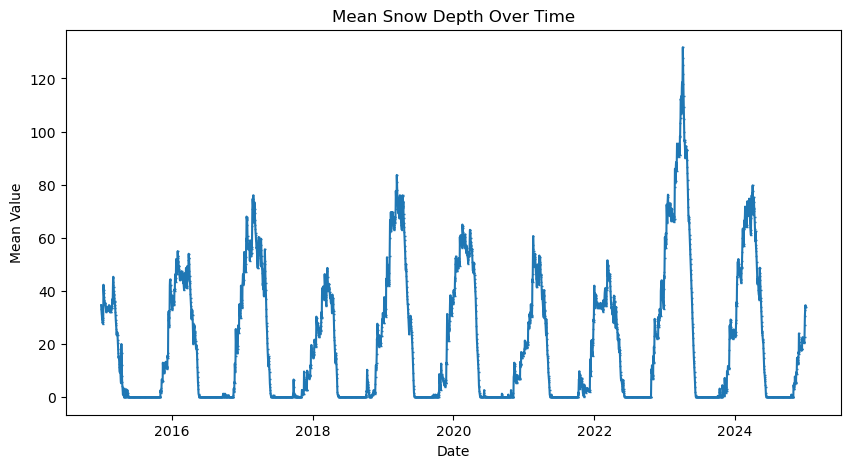

In [27]:
#Time Series Plot

time_series_mean = snow_data.groupby('date')['snowdepth'].mean()
plt.figure(figsize=(10, 5))
plt.plot(time_series_mean, marker='_', markersize= 1)
plt.title('Mean Snow Depth Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.show()

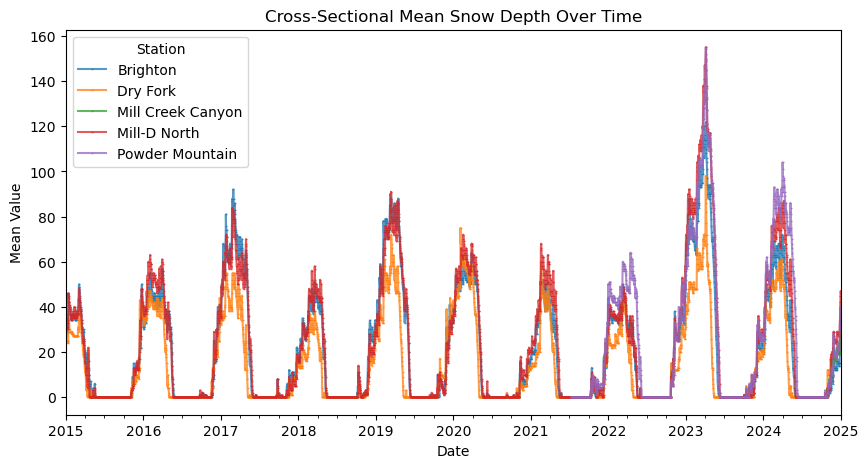

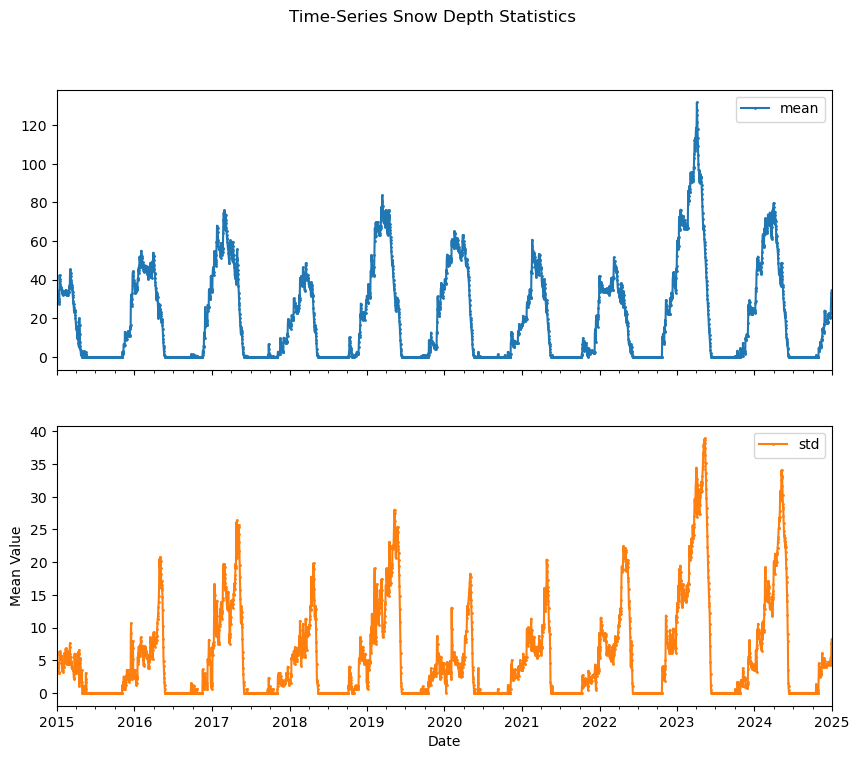

In [29]:
#Panel Data Plot

# Cross-sectional summary statistics over time
cross_sectional_stats = snow_data.groupby(['date', 'station_name'])['snowdepth'].mean().unstack()
cross_sectional_stats.plot(figsize=(10, 5), marker='_', markersize =1, alpha = 0.75)
plt.title('Cross-Sectional Mean Snow Depth Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.legend(title='Station')
plt.show()

# Time-series statistics across the population
time_series_stats = snow_data.groupby('date')['snowdepth'].agg(['mean', 'std'])
time_series_stats.plot(subplots=True, figsize=(10, 8), marker='o', markersize = 1)
plt.suptitle('Time-Series Snow Depth Statistics')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.show()


In [ ]:
#Step two: Exploring relationships between each variable and the target 

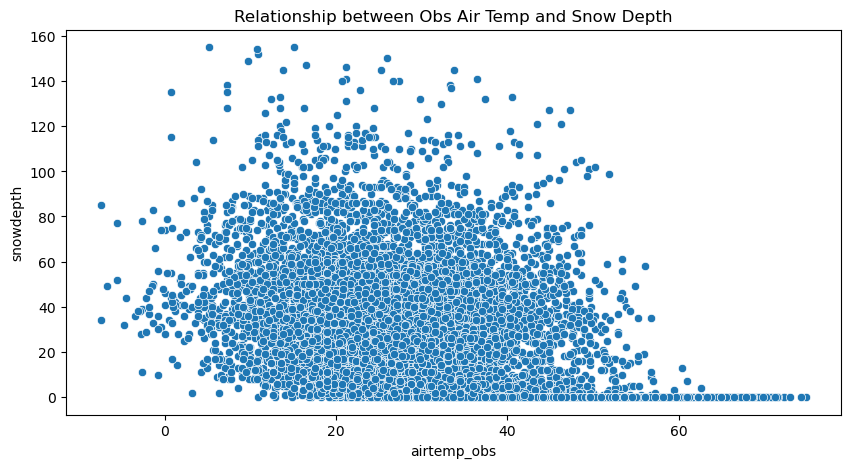

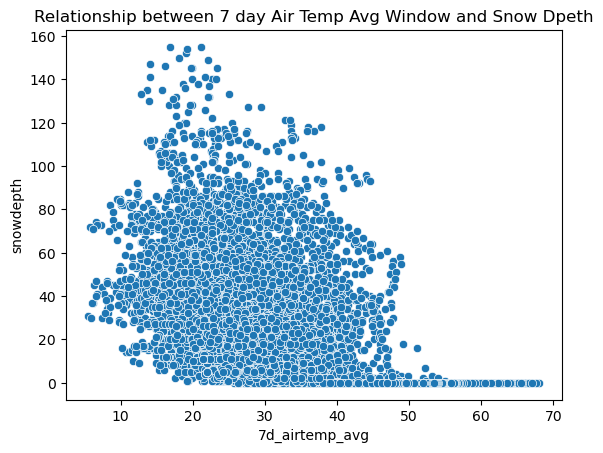

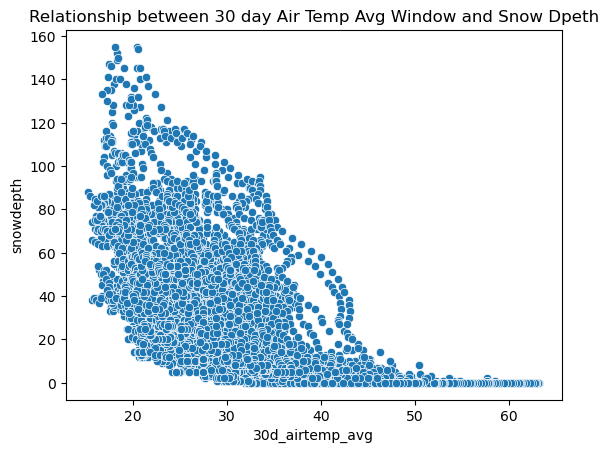

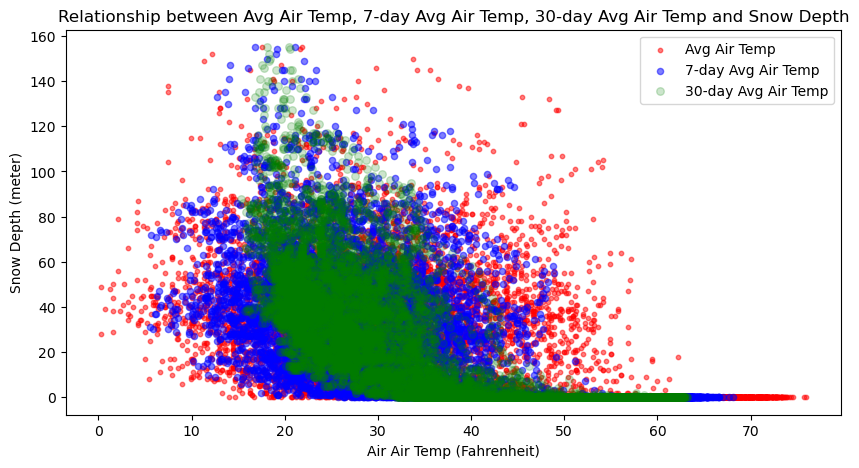

In [31]:
#Scatter plots 

#
plt.figure(figsize=(10, 5))
sns.scatterplot(x='airtemp_obs', y='snowdepth', data=snow_data)
plt.title('Relationship between Obs Air Temp and Snow Depth')
plt.show()

sns.scatterplot(x='7d_airtemp_avg', y='snowdepth', data=snow_data)
plt.title('Relationship between 7 day Air Temp Avg Window and Snow Dpeth')
plt.show()

sns.scatterplot(x='30d_airtemp_avg', y='snowdepth', data=snow_data)
plt.title('Relationship between 30 day Air Temp Avg Window and Snow Dpeth')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(snow_data['airtemp_avg'], snow_data['snowdepth'], color ='red', label='Avg Air Temp', s=10, alpha=0.5)
plt.scatter(snow_data['7d_airtemp_avg'], snow_data['snowdepth'], color ='blue', label='7-day Avg Air Temp', s=20, alpha=0.5)
plt.scatter(snow_data['30d_airtemp_avg'], snow_data['snowdepth'], color ='green', label='30-day Avg Air Temp', s=30, alpha=0.2)
plt.xlabel('Air Air Temp (Fahrenheit)')
plt.ylabel('Snow Depth (meter)')
plt.title('Relationship between Avg Air Temp, 7-day Avg Air Temp, 30-day Avg Air Temp and Snow Depth')
plt.legend()
plt.show()


In [ ]:
#What windows are relevant and should be considered? 

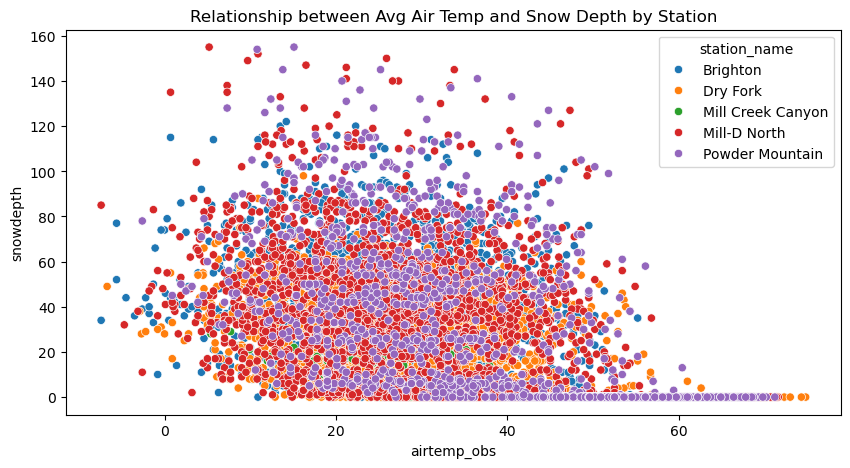

In [33]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='airtemp_obs', y='snowdepth', hue = 'station_name', data=snow_data)
plt.title('Relationship between Avg Air Temp and Snow Depth by Station')
plt.show()


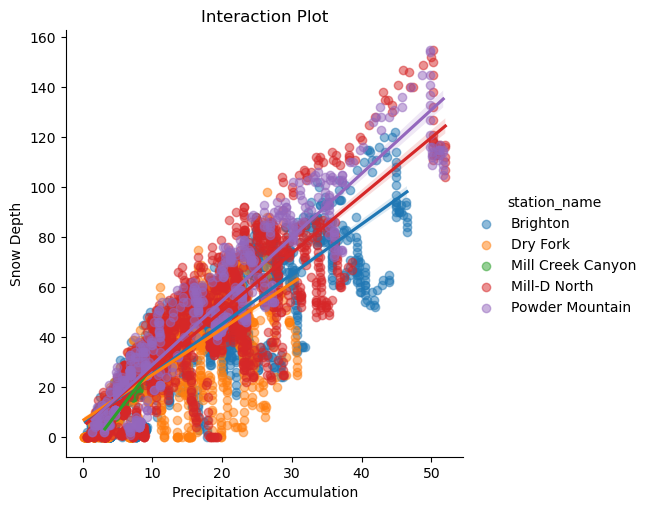

In [35]:
sns.lmplot(x='precip_accumulation', y='snowdepth', hue='station_name', data=winter_data, scatter_kws={'alpha': 0.5})
plt.xlabel('Precipitation Accumulation')
plt.ylabel('Snow Depth')
plt.title('Interaction Plot')
plt.show()

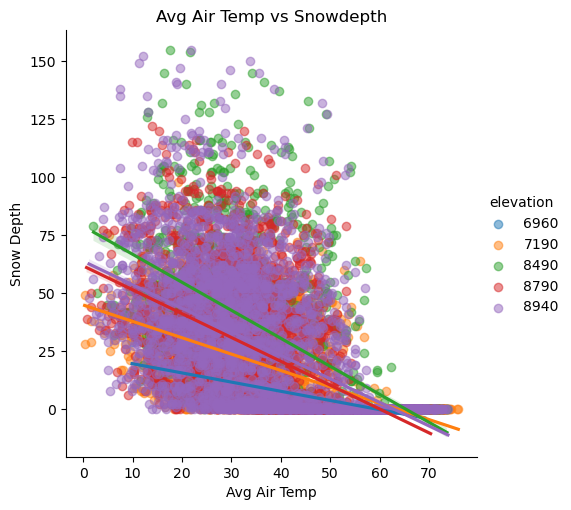

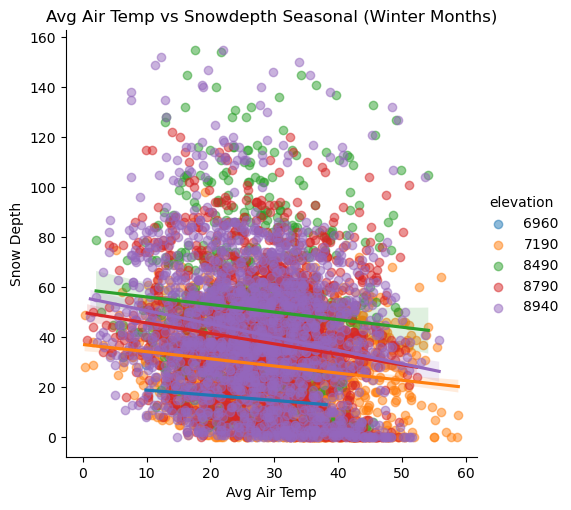

In [37]:
sns.lmplot(x='airtemp_avg', y='snowdepth', hue='elevation', data=snow_data, scatter_kws={'alpha': 0.5})
plt.xlabel('Avg Air Temp')
plt.ylabel('Snow Depth')
plt.title('Avg Air Temp vs Snowdepth')
plt.show()

sns.lmplot(x='airtemp_avg', y='snowdepth', hue='elevation', data=winter_data, scatter_kws={'alpha': 0.5})
plt.xlabel('Avg Air Temp')
plt.ylabel('Snow Depth')
plt.title('Avg Air Temp vs Snowdepth Seasonal (Winter Months)')
plt.show()

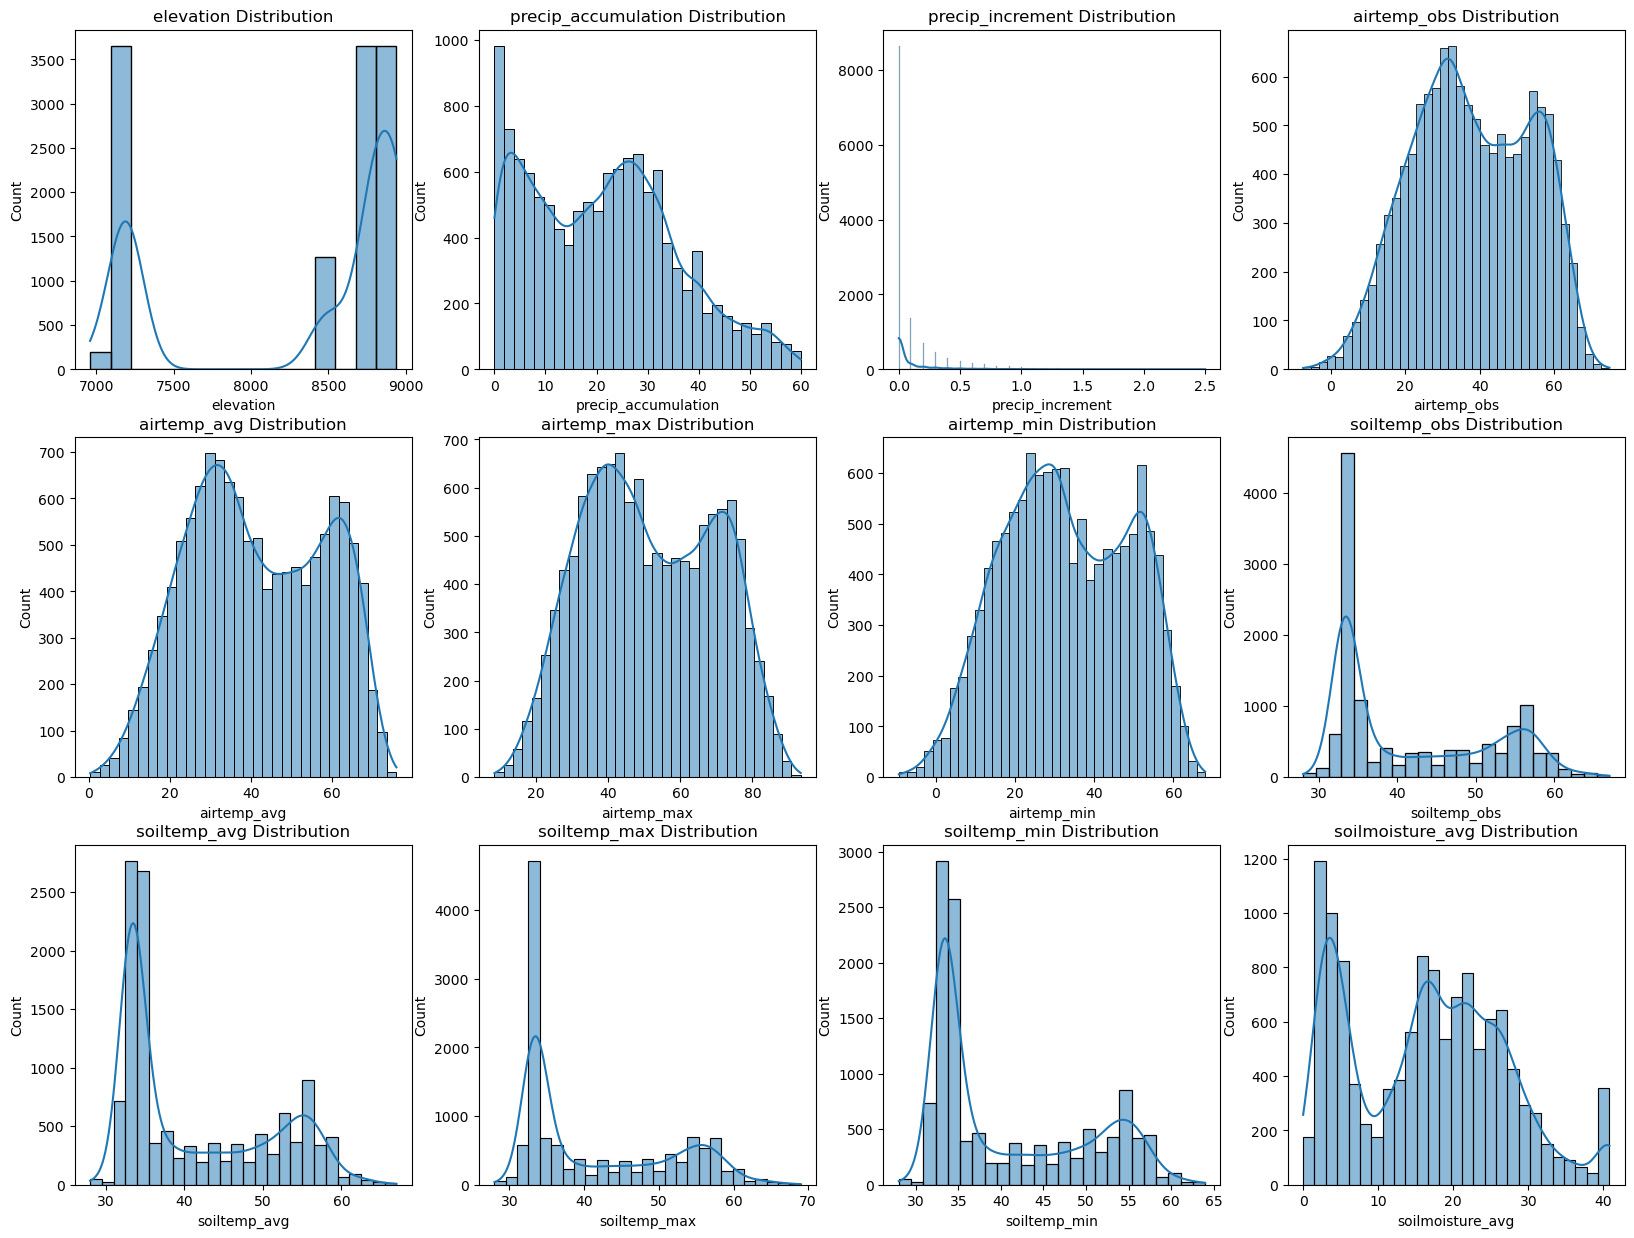

In [50]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
features = ['elevation', 'precip_accumulation', 'precip_increment', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg']

for i, feature in enumerate(features):
    ax = axs[i // 4, i % 4]  # Calculate subplot location
    sns.histplot(snow_data[feature], ax=ax, kde=True)  
    ax.set_title(f'{feature} Distribution')

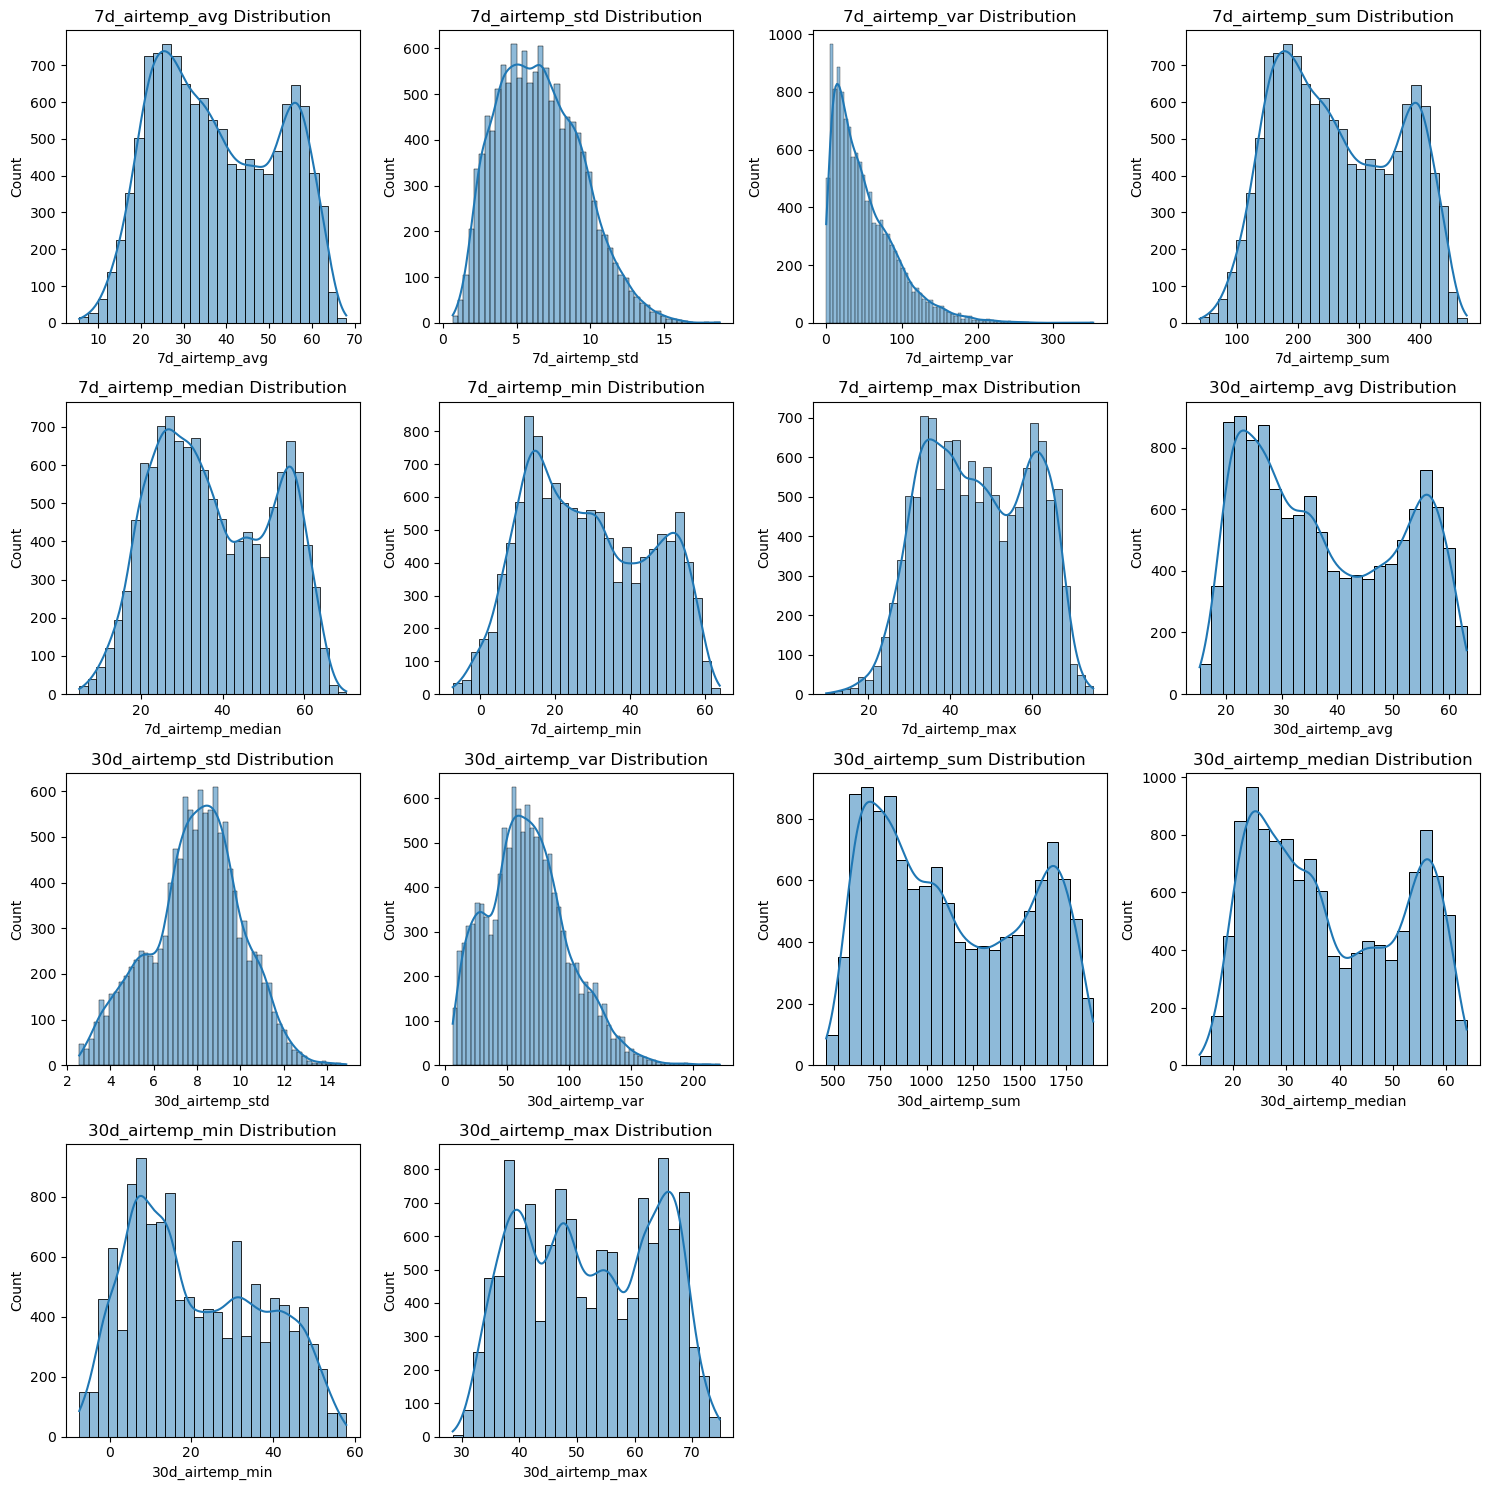

In [64]:
#Distribution for Air Temperature Statistics 7-day and 30-day windows

fig, axs = plt.subplots(4, 4, figsize=(15, 15))
additional_features = ['7d_airtemp_avg', '7d_airtemp_std', '7d_airtemp_var', '7d_airtemp_sum', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max', '30d_airtemp_avg', '30d_airtemp_std', '30d_airtemp_var', '30d_airtemp_sum', '30d_airtemp_median', '30d_airtemp_min', '30d_airtemp_max' ]

axs= axs.flatten()

for i, feature in enumerate(additional_features):
    ax = axs[i]  # Calculate subplot location
    sns.histplot(snow_data[feature], ax=ax, kde=True)  
    ax.set_title(f'{feature} Distribution')

for j in range(i +1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

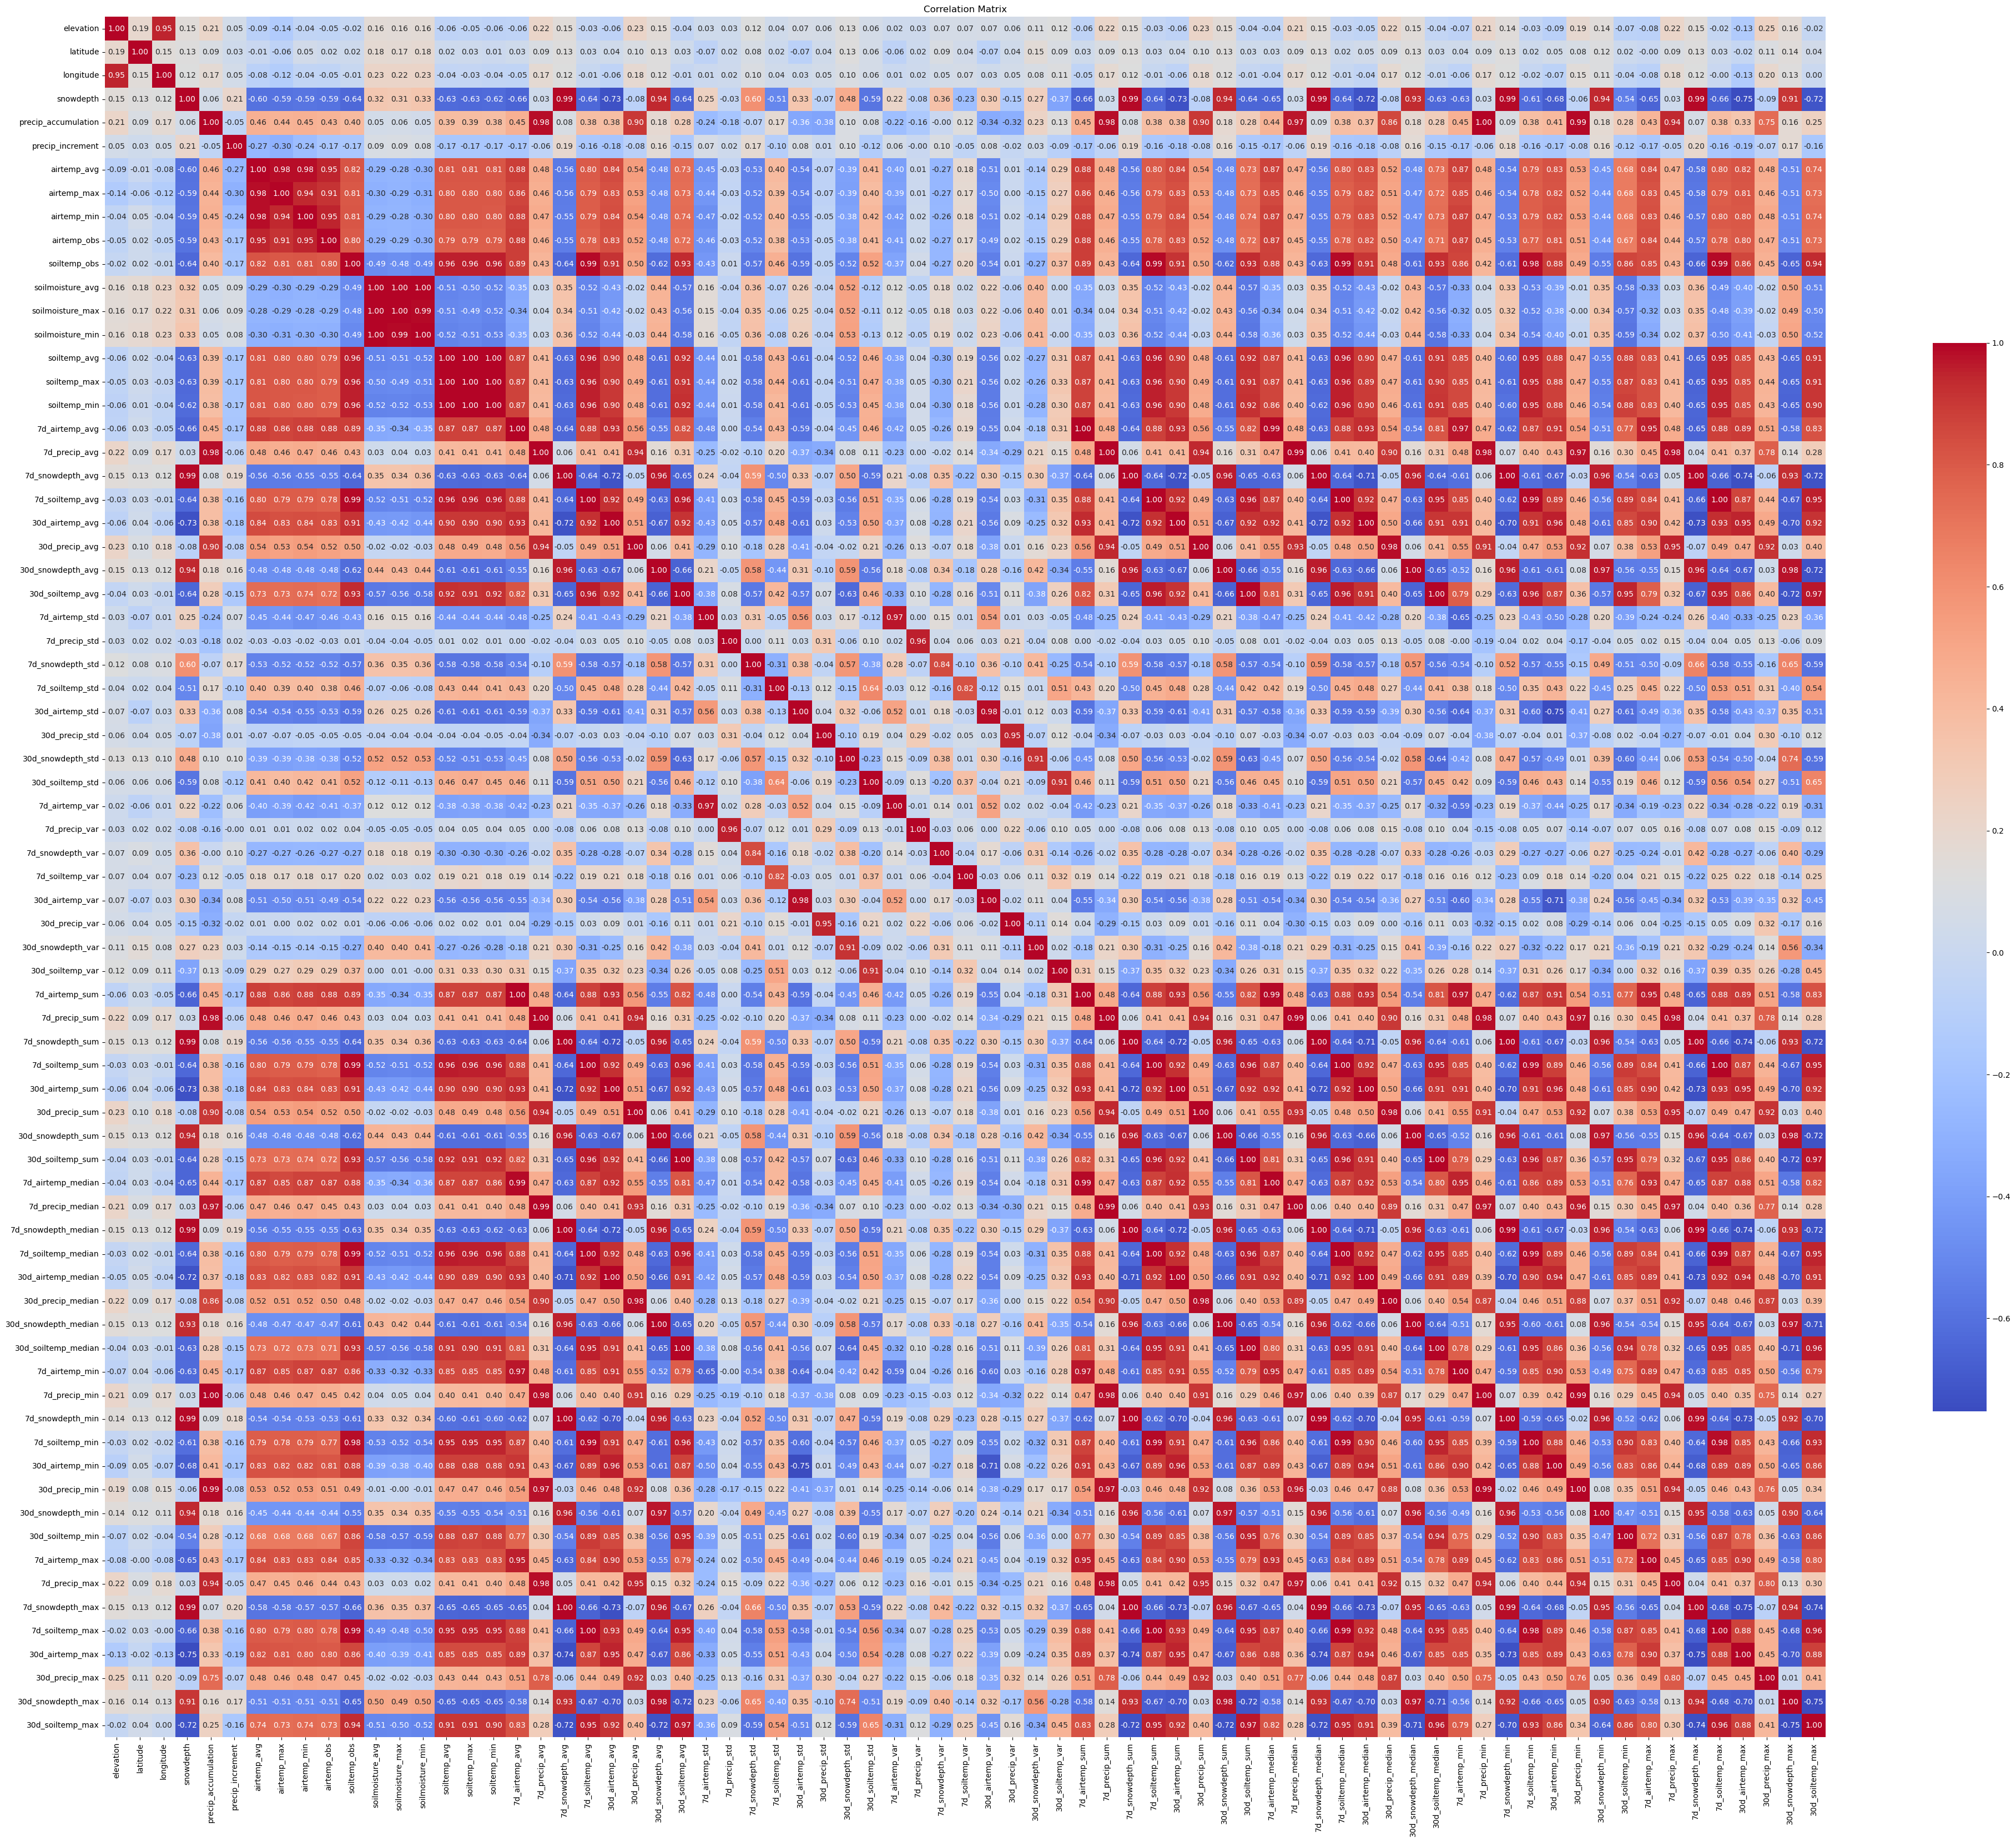

elevation  latitude  longitude  snowdepth  \
elevation                 1.00      0.19       0.95       0.15   
latitude                  0.19      1.00       0.15       0.13   
longitude                 0.95      0.15       1.00       0.12   
snowdepth                 0.15      0.13       0.12       1.00   
precip_accumulation       0.21      0.09       0.17       0.06   
...                        ...       ...        ...        ...   
7d_soiltemp_max          -0.02      0.03      -0.00      -0.66   
30d_airtemp_max          -0.13     -0.02      -0.13      -0.75   
30d_precip_max            0.25      0.11       0.20      -0.09   
30d_snowdepth_max         0.16      0.14       0.13       0.91   
30d_soiltemp_max         -0.02      0.04       0.00      -0.72   

                     precip_accumulation  precip_increment  airtemp_avg  \
elevation                           0.21              0.05        -0.09   
latitude                            0.09              0.03        -0.01   
longitude                           0.17              0.05        -0.08   
snowdepth                           0.06              0.21        -0.60   
precip_accumulation                 1.00             -0.05         0.46   
...                                  ...               ...          ...   
7d_soiltemp_max                     0.38             -0.16         0.80   
30d_airtemp_max                     0.33             -0.19         0.82   
30d_precip_max                      0.75             -0.07         0.48   
30d_snowdepth_max                   0.16              0.17        -0.51   
30d_soiltemp_max                    0.25             -0.16         0.74   

                     airtemp_max  airtemp_min  airtemp_obs  ...  \
elevation                  -0.14        -0.04        -0.05  ...   
latitude                   -0.06         0.05         0.02  ...   
longitude                  -0.12        -0.04        -0.05  ...   
snowdepth                  -0.59        -0.59        -0.59  ...   
precip_accumulation         0.44         0.45         0.43  ...   
...                          ...          ...          ...  ...   
7d_soiltemp_max             0.79         0.80         0.78  ...   
30d_airtemp_max             0.81         0.80         0.80  ...   
30d_precip_max              0.46         0.48         0.47  ...   
30d_snowdepth_max          -0.51        -0.51        -0.51  ...   
30d_soiltemp_max            0.73         0.74         0.73  ...   

                     30d_snowdepth_min  30d_soiltemp_min  7d_airtemp_max  \
elevation                         0.14             -0.07           -0.08   
latitude                          0.12              0.02           -0.00   
longitude                         0.11             -0.04           -0.08   
snowdepth                         0.94             -0.54           -0.65   
precip_accumulation               0.18              0.28            0.43   
...                                ...               ...             ...   
7d_soiltemp_max                  -0.58              0.87            0.85   
30d_airtemp_max                  -0.63              0.78            0.90   
30d_precip_max                    0.05              0.36            0.49   
30d_snowdepth_max                 0.90             -0.63           -0.58   
30d_soiltemp_max                 -0.64              0.86            0.80   

                     7d_precip_max  7d_snowdepth_max  7d_soiltemp_max  \
elevation                     0.22              0.15            -0.02   
latitude                      0.09              0.13             0.03   
longitude                     0.18              0.12            -0.00   
snowdepth                     0.03              0.99            -0.66   
precip_accumulation           0.94              0.07             0.38   
...                            ...               ...              ...   
7d_soiltemp_max               0.41             -0.68             1.00   
30d_airtemp_max          

In [78]:
#Correlation Matrix
df_numeric = snow_data.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix')
plt.show()

corr_matrix = df_numeric.corr().round(2)
display(corr_matrix)

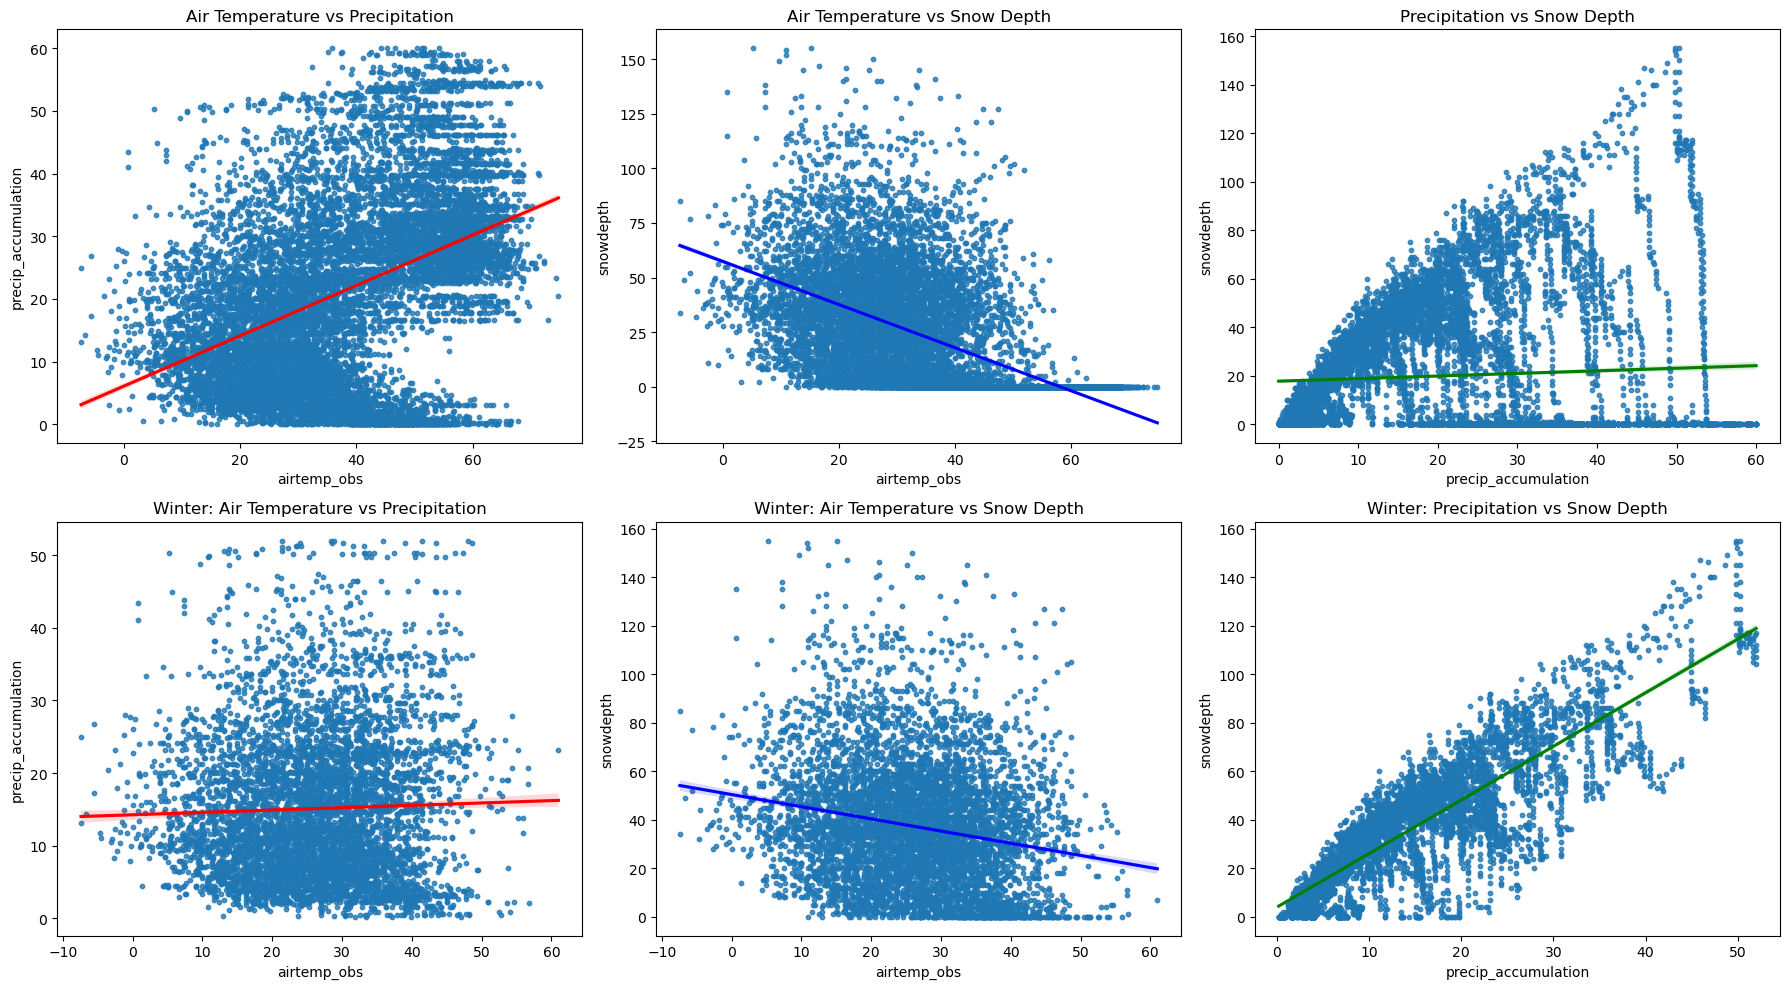

In [94]:
#Step three:  Assessing  interactions  between  variables  
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows and 3 columns

# Scatter plot between Air Temperature and Precipitation
sns.regplot(x='airtemp_obs', y='precip_accumulation', data=snow_data, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=axs[0, 0])
axs[0, 0].set_title('Air Temperature vs Precipitation')

# Scatter plot between Air Temperature and Snow Depth
sns.regplot(x='airtemp_obs', y='snowdepth', data=snow_data, scatter_kws={'s':10}, line_kws={'color':'blue'}, ax=axs[0, 1])
axs[0, 1].set_title('Air Temperature vs Snow Depth')

# Scatter plot between Precipitation and Snow Depth
sns.regplot(x='precip_accumulation', y='snowdepth', data=snow_data, scatter_kws={'s':10}, line_kws={'color':'green'}, ax=axs[0, 2])
axs[0, 2].set_title('Precipitation vs Snow Depth')

# Scatter plots with only winter months
sns.regplot(x='airtemp_obs', y='precip_accumulation', data=winter_data, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=axs[1, 0])
axs[1, 0].set_title('Winter: Air Temperature vs Precipitation')

# Scatter plot between Air Temperature and Snow Depth
sns.regplot(x='airtemp_obs', y='snowdepth', data=winter_data, scatter_kws={'s':10}, line_kws={'color':'blue'}, ax=axs[1, 1])
axs[1, 1].set_title('Winter: Air Temperature vs Snow Depth')

# Scatter plot between Precipitation and Snow Depth
sns.regplot(x='precip_accumulation', y='snowdepth', data=winter_data, scatter_kws={'s':10}, line_kws={'color':'green'}, ax=axs[1, 2])
axs[1, 2].set_title('Winter: Precipitation vs Snow Depth')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#Should the seasonal data be used instead? 
#Checking the distribution of potential features 

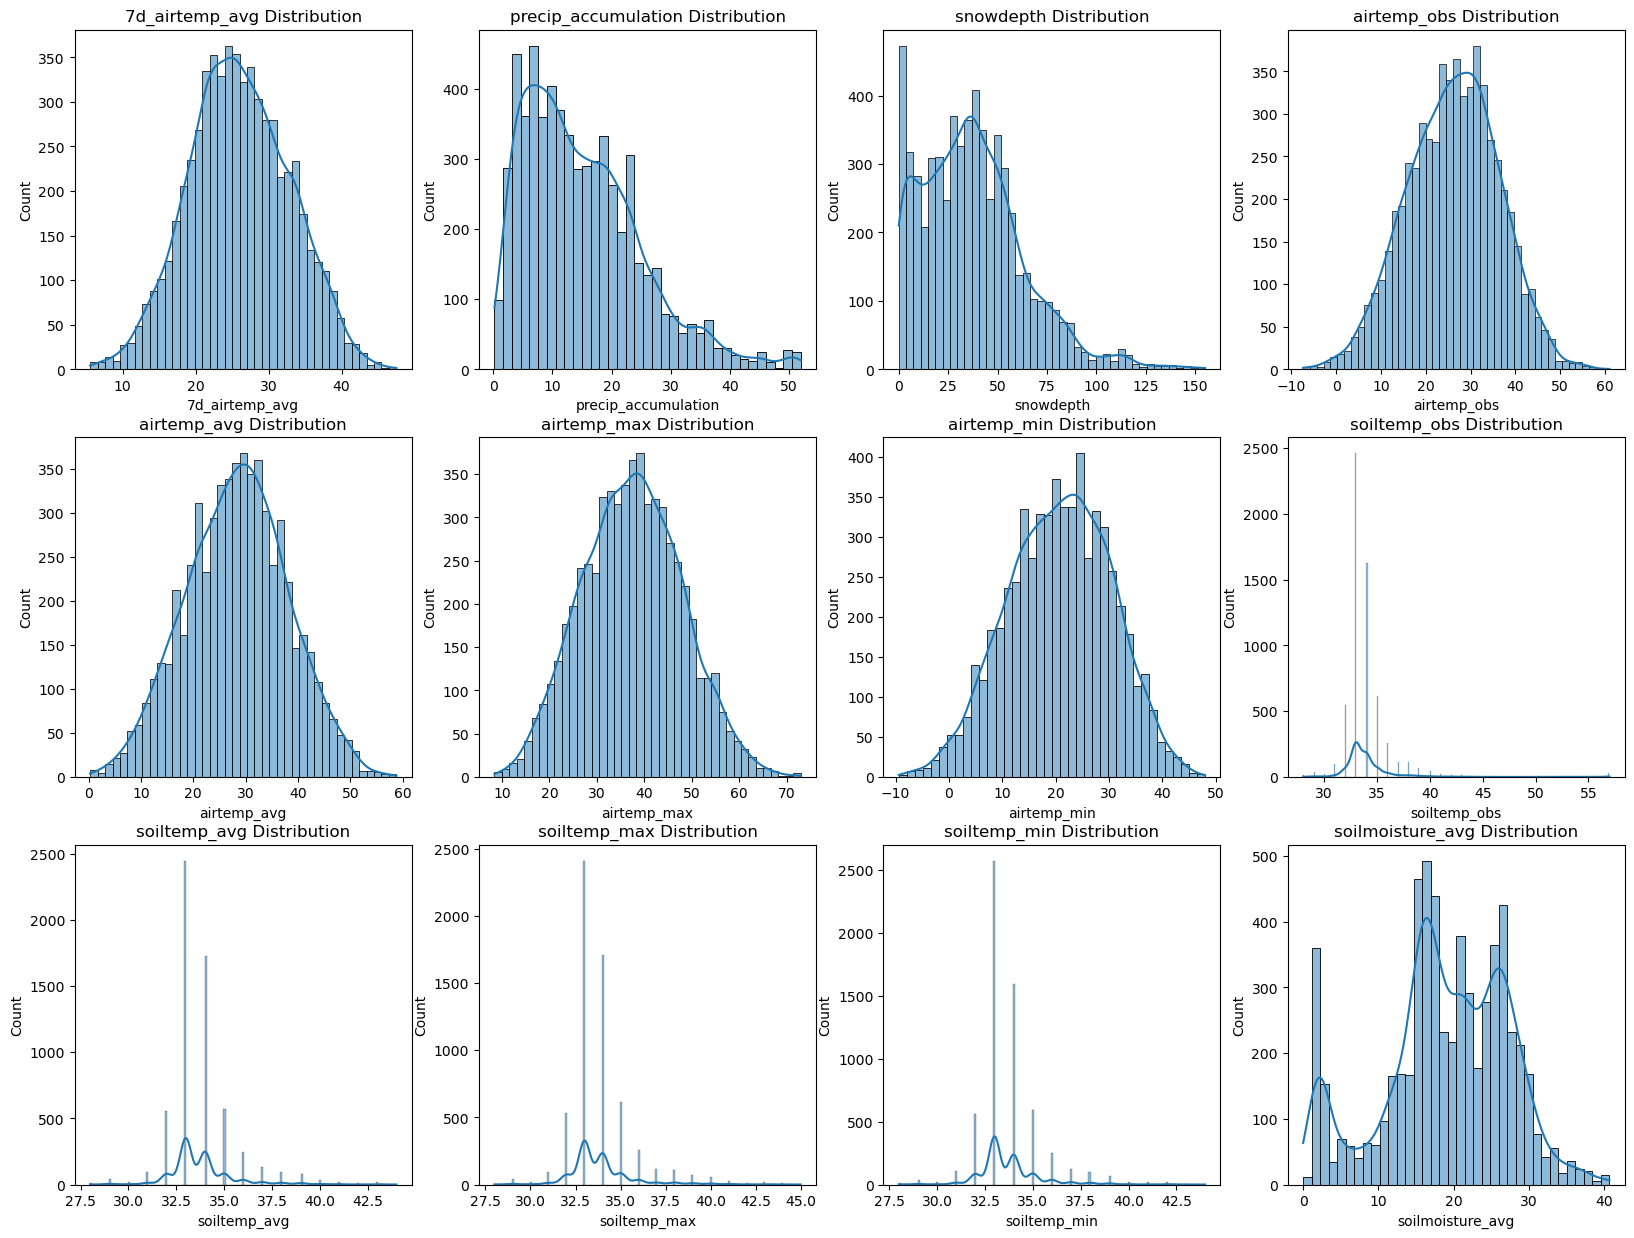

In [155]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))
features = ['7d_airtemp_avg', 'precip_accumulation', 'snowdepth', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg']

for i, feature in enumerate(features):
    ax = axs[i // 4, i % 4]  # Calculate subplot location
    sns.histplot(winter_data[feature], ax=ax, kde=True)  
    ax.set_title(f'{feature} Distribution')

In [167]:
features = ['7d_airtemp_avg', 'precip_accumulation', '30d_airtemp_avg', 'airtemp_obs', 'airtemp_avg', 'airtemp_max', 'airtemp_min', 'soiltemp_obs', 'soiltemp_avg', 'soiltemp_max', 'soiltemp_min', 'soilmoisture_avg', '7d_airtemp_sum', '7d_airtemp_median', '7d_airtemp_min', '7d_airtemp_max']
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    nrow = len(columns) // ncol + 1
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x=winter_data[col], y=winter_data['snowdepth'], alpha=0.5)
        ax.set(xlabel=col, ylabel='Snow Depth (m)')
    fig.tight_layout()
    plt.show()   


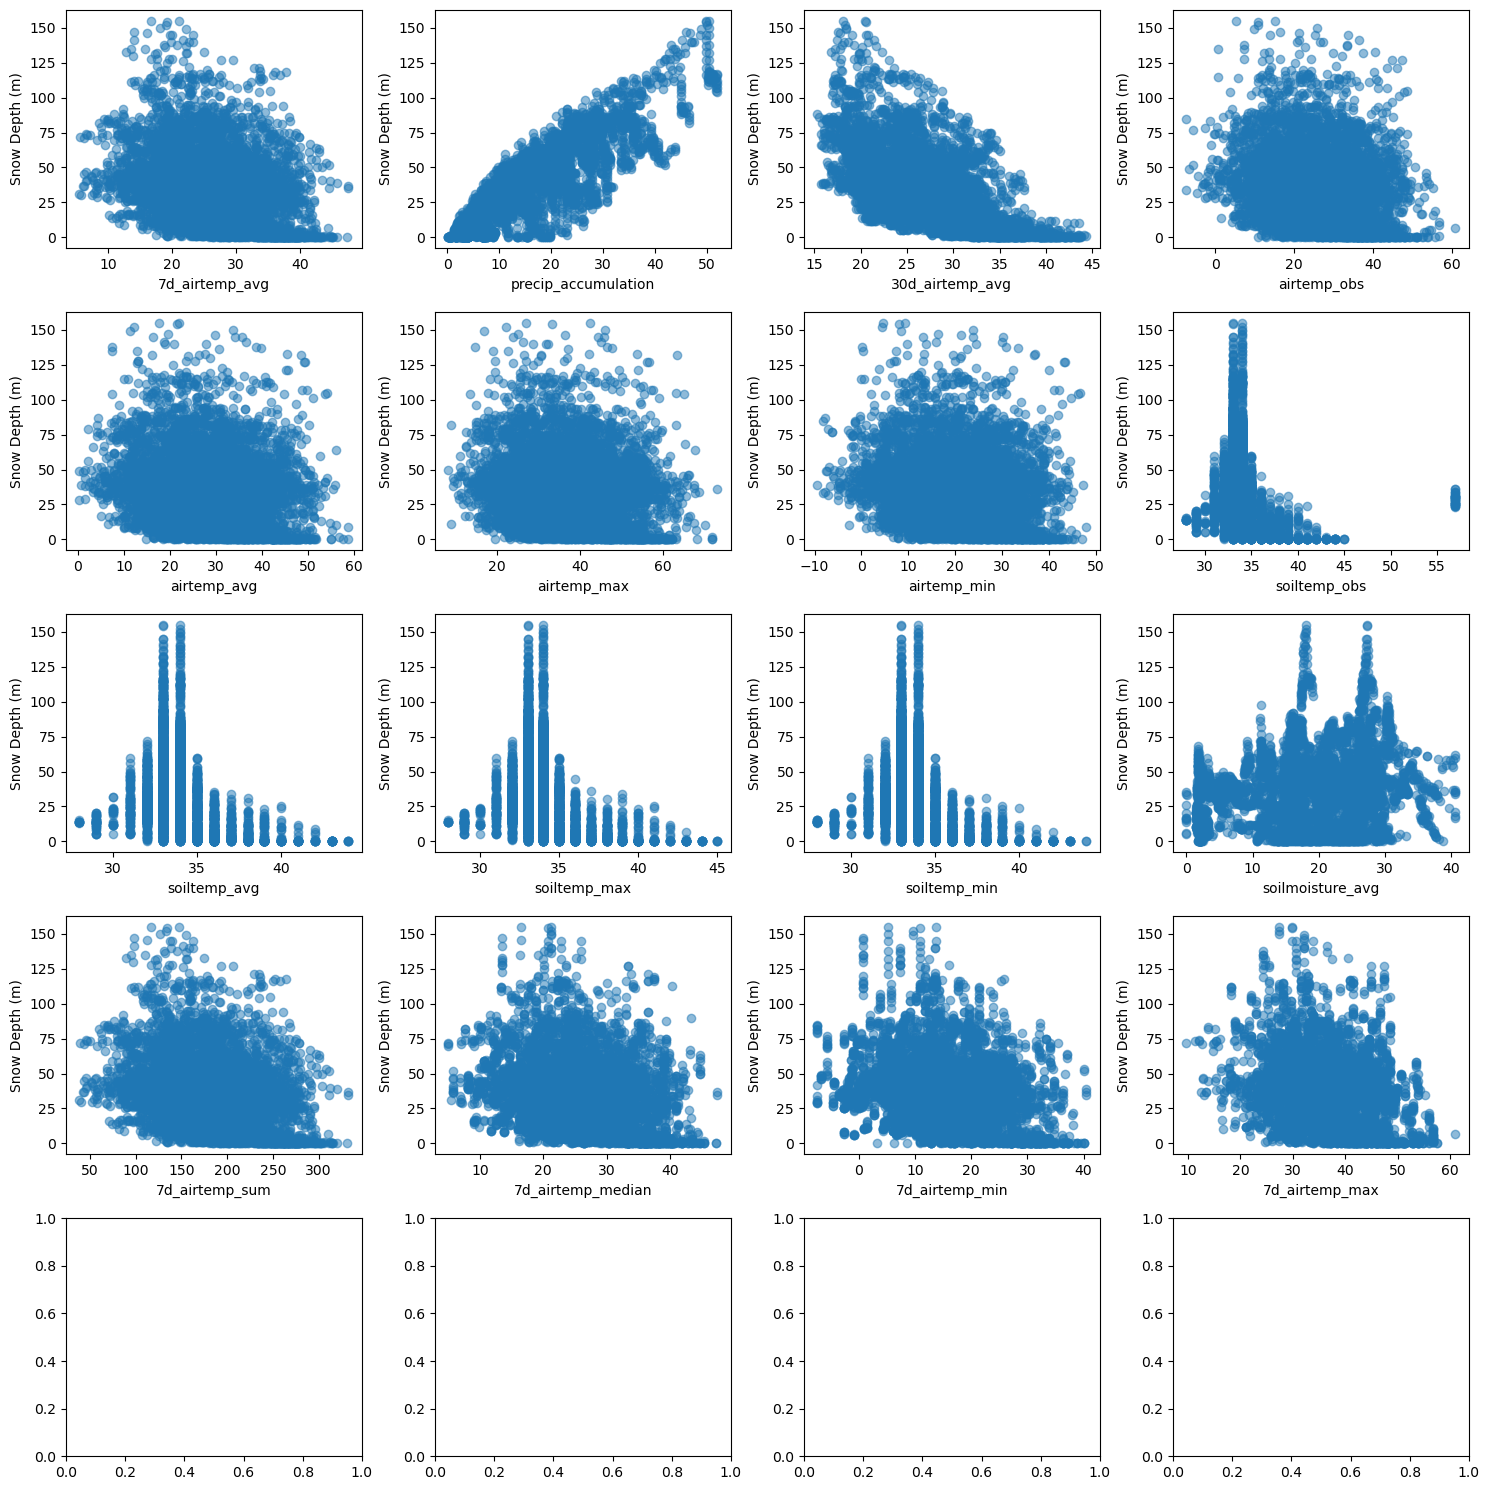

In [169]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [ ]:
#Step 4: Exploring data across many dimensions

In [107]:
#Parallel Coordinates plot?
#PCA 
#Clustering 

In [43]:
import os

datapath = 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data'
snow_data_eda = 'snow_data_cleaned.csv'
filepath = os.path.join(datapath, snow_data_eda)


snow_data.to_csv(filepath, index=False)
print(f"Data saved successfully to '{filepath}'")


Data saved successfully to 'C:/Users/aamal/Desktop/Springboard/Springboard_DataScience/Capstone-Snow-Prediction/Data\snow_data_cleaned.csv'
